In [6]:
from IPython import display

# De novo assembly and analysis of the transcriptome of Panicum miliaceum L

## 1. Introduction

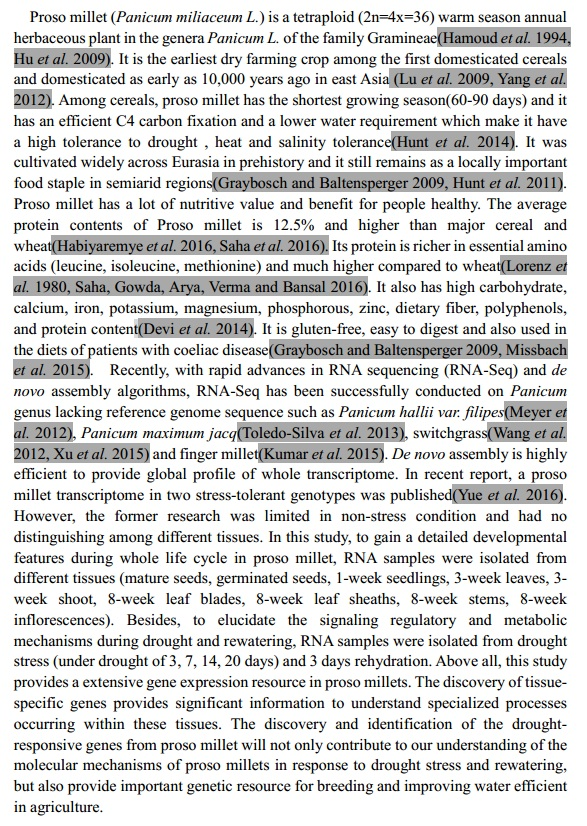

In [8]:
display.Image("notebook_material/Proso_millet_introduction.jpg")

## 2.Analysis

`source /home/czhao/My_project/Assembly_millet/bin/source.bash`

###  2.1 Quality control of raw_reads

We used the tools of [Trimmomatic](http://www.usadellab.org/cms/?page=trimmomatic) to do the quality control of raw reads.
code:

`java -jar /psc/home/zhaocheng/tools/Trimmomatic-0.36/trimmomatic-0.36.jar PE -threads 10 -phred33 -trimlog  $TMPD/clean_data/${ARRAY[$SGE_TASK_ID]}/trim.log  $DATA/Reads/${ARRAY[$SGE_TASK_ID]}_R1.fastq $DATA/Reads/${ARRAY[$SGE_TASK_ID]}_R2.fastq -baseout $TMPD/clean_data/${ARRAY[$SGE_TASK_ID]}/${ARRAY[$SGE_TASK_ID]}.fastq ILLUMINACLIP:$ADA:2:30:10 LEADING:3 SLIDINGWINDOW:4:30 MINLEN:36 2> $TMPD/clean_data/${ARRAY[$SGE_TASK_ID]}/Trim.sta
`

`qsub $BIN/QC.trim.bash`



### 2.2 Combine the clean reads and use the [trinity](https://github.com/trinityrnaseq/trinityrnaseq/wiki) to do assembly

`
cd $DATA/clean_data
cat 1W_Se_2/1W_Se_2_1P.fastq 1W_Se_3/1W_Se_3_1P.fastq 1W_Se_5/1W_Se_5_1P.fastq 3W_Le_1/3W_Le_1_1P.fastq 3W_Le_2/3W_Le_2_1P.fastq 3W_Le_3/3W_Le_3_1P.fastq 3W_St_1/3W_St_1_1P.fastq 3W_St_2/3W_St_2_1P.fastq 3W_St_3/3W_St_3_1P.fastq 8W_In_1/8W_In_1_1P.fastq 8W_In_4/8W_In_4_1P.fastq 8W_In_5/8W_In_5_1P.fastq 8W_LB_3/8W_LB_3_1P.fastq 8W_LB_4/8W_LB_4_1P.fastq 8W_LB_5/8W_LB_5_1P.fastq 8W_LS_4/8W_LS_4_1P.fastq 8W_LS_5/8W_LS_5_1P.fastq 8W_LS_6/8W_LS_6_1P.fastq 8W_Ro_1/8W_Ro_1_1P.fastq 8W_Ro_5/8W_Ro_5_1P.fastq 8W_Ro_6/8W_Ro_6_1P.fastq 8W_St_3/8W_St_3_1P.fastq 8W_St_4/8W_St_4_1P.fastq 8W_St_5/8W_St_5_1P.fastq Dry_14D_3/Dry_14D_3_1P.fastq Dry_14D_4/Dry_14D_4_1P.fastq Dry_14D_5/Dry_14D_5_1P.fastq Dry_20D_1/Dry_20D_1_1P.fastq Dry_20D_2/Dry_20D_2_1P.fastq Dry_20D_3/Dry_20D_3_1P.fastq Dry_3D_2/Dry_3D_2_1P.fastq Dry_3D_4/Dry_3D_4_1P.fastq Dry_3D_5/Dry_3D_5_1P.fastq Dry_7D_2/Dry_7D_2_1P.fastq Dry_7D_5/Dry_7D_5_1P.fastq Dry_7D_6/Dry_7D_6_1P.fastq Dry_Reh_1/Dry_Reh_1_1P.fastq Dry_Reh_2/Dry_Reh_2_1P.fastq Dry_Reh_5/Dry_Reh_5_1P.fastq OTD_Se_2/OTD_Se_2_1P.fastq OTD_Se_4/OTD_Se_4_1P.fastq OTD_Se_6/OTD_Se_6_1P.fastq OTD_SM_1/OTD_SM_1_1P.fastq OTD_SM_2/OTD_SM_2_1P.fastq OTD_SM_3/OTD_SM_3_1P.fastq > Total_1P.fastq
`

`
cat 1W_Se_2/1W_Se_2_2P.fastq 1W_Se_3/1W_Se_3_2P.fastq 1W_Se_5/1W_Se_5_2P.fastq 3W_Le_1/3W_Le_1_2P.fastq 3W_Le_2/3W_Le_2_2P.fastq 3W_Le_3/3W_Le_3_2P.fastq 3W_St_1/3W_St_1_2P.fastq 3W_St_2/3W_St_2_2P.fastq 3W_St_3/3W_St_3_2P.fastq 8W_In_1/8W_In_1_2P.fastq 8W_In_4/8W_In_4_2P.fastq 8W_In_5/8W_In_5_2P.fastq 8W_LB_3/8W_LB_3_2P.fastq 8W_LB_4/8W_LB_4_2P.fastq 8W_LB_5/8W_LB_5_2P.fastq 8W_LS_4/8W_LS_4_2P.fastq 8W_LS_5/8W_LS_5_2P.fastq 8W_LS_6/8W_LS_6_2P.fastq 8W_Ro_1/8W_Ro_1_2P.fastq 8W_Ro_5/8W_Ro_5_2P.fastq 8W_Ro_6/8W_Ro_6_2P.fastq 8W_St_3/8W_St_3_2P.fastq 8W_St_4/8W_St_4_2P.fastq 8W_St_5/8W_St_5_2P.fastq Dry_14D_3/Dry_14D_3_2P.fastq Dry_14D_4/Dry_14D_4_2P.fastq Dry_14D_5/Dry_14D_5_2P.fastq Dry_20D_1/Dry_20D_1_2P.fastq Dry_20D_2/Dry_20D_2_2P.fastq Dry_20D_3/Dry_20D_3_2P.fastq Dry_3D_2/Dry_3D_2_2P.fastq Dry_3D_4/Dry_3D_4_2P.fastq Dry_3D_5/Dry_3D_5_2P.fastq Dry_7D_2/Dry_7D_2_2P.fastq Dry_7D_5/Dry_7D_5_2P.fastq Dry_7D_6/Dry_7D_6_2P.fastq Dry_Reh_1/Dry_Reh_1_2P.fastq Dry_Reh_2/Dry_Reh_2_2P.fastq Dry_Reh_5/Dry_Reh_5_2P.fastq OTD_Se_2/OTD_Se_2_2P.fastq OTD_Se_4/OTD_Se_4_2P.fastq OTD_Se_6/OTD_Se_6_2P.fastq OTD_SM_1/OTD_SM_1_2P.fastq OTD_SM_2/OTD_SM_2_2P.fastq OTD_SM_3/OTD_SM_3_2P.fastq > Total_2P.fastq
`

** About Trinity **

`
cd $DATA/clean_data
nohup /usr/bin/perl  /home/czhao/tools/trinityrnaseq-2.2.0/Trinity --normalize_reads --seqType fq --max_memory 850G --left Total_1P.fastq  --right Total_2P.fastq --CPU 24 --verbose &
`


### 2.3 Calculate expression level of raw transcripts in total samples

`
cat $DATA/clean_data/trinity_out_dir/Trinity.fasta |sed -e 's/TRINITY_//'|sed -e  "s/_c/c/" > Trinity.mod.fasta
$TRINITY_DIR/util/align_and_estimate_abundance.pl --transcripts Trinity.mod.fasta --est_method RSEM --aln_method bowtie2 --trinity_mode --prep_reference --output_dir ./
`                                                                                                                            

`$TRINITY_DIR/util/align_and_estimate_abundance.pl --transcripts $DATA/Trinity.mod.fasta --seqType fq --left $DATA/clean_data/Total_1P.fastq --right $DATA/clean_data/Total_2P.fastq  --aln_method bowtie2 --est_method RSEM --thread_count 24 --trinity_mode --output_prefix RSEM --output_dir rsem_outdir 2> aln.log`                          



### 2.4 Calculate the expression level of raw transcripts in each samples

`qsub $BIN/Raw_reference_mapping.bash`

**Applying a minimum expression-based filtering**

Filter the raw transcripts according the transcripts expression (FPKM >1 at least in one samples, replicates were averanged)

After the filtering ,the transcripts were clustered by cd-hist-est -c 0.95 -n 8 to remove similar or redundant contigs

Remember to build the RSEM mapping index

`bash $BIN/Trinity_assembly.bash`


 ### 2.5 Calculate expression level of filtering transcripts in total samples
 
`qsub $BIN/Filter_reference_mapping.bash`


###  2. 6 Transcriptome Assembly Quality Assessment

#### 2.6.1  Examine the RNA-Seq read representation of the assembly

`bash $BIN/QC_MAP.stastic.bash`


#### 2.6.2 Examine the representation of full-length reconstructed protein-coding genes, by searching the assembled transcripts against a database of known protein sequences

+ predict protein sequence of filtering transcripts

  `/home/czhao/tools/TransDecoder-3.0.0/TransDecoder.LongOrfs -t Total.filter.cdhit.fa
blastp -query Total.filter.cdhit.fa.transdecoder_dir/longest_orfs.pep  -db /oldgroupshare/bioinformatics/zhaocheng/Genome/Swiss_prot/uniprot_sprot.fasta  -max_target_seqs 1 -outfmt 6 -evalue 1e-5 -num_threads 10 > TransDecod.blastp.outfmt6
hmmscan --cpu 10 --domtblout TransDecod.pfam.domtblout /oldgroupshare/bioinformatics/zhaocheng/Genome/Pfam/Pfam-A.hmm Total.filter.cdhit.fa.transdecoder_dir/longest_orfs.pep
/home/czhao/tools/TransDecoder-3.0.0/TransDecoder.Predict -t  Total.filter.cdhit.fa  --single_best_orf --retain_pfam_hits TransDecod.pfam.domtblout --retain_blastp_hits TransDecod.blastp.outfmt6 --cpu 16
`


+ Transcripts had best hit in Arabidopsis, Rice and Sateria Italica. 

    `bash $BIN/Trinity_assembly_valuation.bash`
    
    \#hit_pct_cov_bin	count_in_bin A->B. Number of pct_cov of B 
    
    \# Results in $RE/Comparision_of_ortholog.out

###  2.7  Transcriptome assembly  annotation

The transcripts from the final transcriptome were searched against the Nr, Nt, Swiss-Prot protein and COG/KOG databases using BLAST v2.2.26 with an cutoff E-value of 1e−5. To assign functional annotations, the transcripts were searched against Pfam using HMMER v3.0 (Finn, Clements, & Eddy, 2011) with E-value of 1e−2, the KEGG database using KAAS (KEGG Automatic Annotation Server) (Moriya, Itoh, Okuda, Yoshizawa, & Kanehisa, 2007) and the GO database using Blast2GO v1.0.2 (Conesa et al., 2005) with an E-value of 1e−5. Transcription factor (TF) domains were identified and annotated using the online software PlantTFcat (Dai, Sinharoy, Udvardi, & Zhao, 2013). Simple sequence repeats were identified by MISA (MIcroSAtellite identification tool) v1.0 with default parameters (http://pgrc.ipk-gatersleben.de/misa/). MapMan bin codes of transcripts sequences were annotated by Mercator (http://mapman.gabipd.org/web/guest/app/mercator) tools.

`bash $BIN/Trinity_assembly_valuation.bash`

\# Results in $RE/Assemble_anno.out

###  2.7  Transcriptome assembly  annotation

`bash $BIN/Unigene.analysis.bash`

#### 2.7.1 Length distribution of Unigenes and transcripts

`Rscript $SRC/Trans_gene_length.distribution.R`

#### 2.7.2 Gene Ontology classfication

`join -1 1 -2 1 -t$'\t' <(sort -k1,1 $DOC/level2.terms_and_ids) <(python3 ~/PC/python_code/geneid2go_split.py GO2geneID_ALL.map|sort -k1,1)|cut -f 1,4 |cut -f1,2 -d "_"|sort|uniq |sort -k1,1|groupBy -g 1 -c 2 -o count|perl $DOC/join_for_input.pl $DOC/level2.terms_and_ids > wego.R.input`

`Rscript $SRC/wego.R`

#### 2.7.3 KEGG classfication

`echo  -e "GeneID\tENTRY_ID\tname\tDEFINITION\tPathway_ID\tPathway" > PM.KEGG.anno.out
join -1 1 -2 1 -t$'\t' <(sort -k1,1 $DOC/KEGG.anno.deb) <(grep "\bK" KEGG.query.out |awk '{OFS="\t";print $2,$1}'|cut -f 1,2 -d "_"|sort |uniq|sort -k1,1 ) |awk -F "\t" '{OFS="\t";print $6,$1,$2,$3,$4,$5}' >> PM.KEGG.anno.out
join -1 2 -2 3 -t$'\t' <(cut -f 1,5 PM.KEGG.anno.out|sort |uniq|sort -k2,2  ) <(sort -k3,3 -t$'\t' $DOC/KEGG.category.out )|cut -f 3,4 |perl ~/PC/code/count_repeat.pl |sort -k1,1 -k2,2 -t$'\t'  > KEGG.wego.R.input`                                                                                  

`Rscript $SRC/KEGG.weGO.R`

#### 2.7.4 Transcripts constitutively expressed in the different plant tissues, called reference transcripts_Tissues and constitutively expressed under drought stress called reference transcripts_drougth with corresponding transcript ID, CV and tentative annotation. (CV <10% as cutoff)

`Rscript $SRC/house_keeping_gene.R`

`perl ~/PC/code/add_annotation.pl Reference_filtered/Final_filtered/PM.anno.out Tissue.house.keeping.out |cut -f 1,2,3,6|sed -e 's/None/--/' > $RE/Tissue.house.keeping.anno.out
perl ~/PC/code/add_annotation.pl Reference_filtered/Final_filtered/PM.anno.out Drought.house.keeping.out |cut -f 1,2,3,6|sed -e 's/None/--/' > $RE/Drought.house.keeping.anno.out `

`# Drought.house.keeping.anno.out and Tissue.house.keeping.anno.out in $RE`

#### 2.7.5 Differentially expressed genes analysis

`Rscript $SRC/UG.edgeR.R
mkdir -p $TMPD/UG_EDGER
mv $TMPD/*VS*edgeR.out* $TMPD/UG_EDGER 
`

#### 2.7.6 Global analysis of RNA-Seq data from different tissues.

`Rscript $SRC/UG.Samples_pheat_MDS_cluster.R`

`Rscript $SRC/UG.Tissue_specific.R`

`perl $SRC/add_annotation.pl $TMPD/Reference_filtered/UG.PM.anno.out  TIS_SEP.fpkm.temp > $RE/TIS_SEP.fpkm.xls                                                                         
Rscript $SRC/UG.Tissue_specific.R`

`for ITEM in OTD_Se OTD_SM W1_Se W3_Le W3_St W8_In W8_LB W8_LS  W8_St
do
        cd $TMPD/DEG/UG_DEG_filtered/TIS_SPE
        sed -n '2,$p' TIS_SEP.fpkm.out|grep ${ITEM} |cut -f 1 |sort |uniq > ${ITEM}.spe.ID
        Rscript $SRC/UG.topGO_argv.R $TMPD/DEG/UG_DEG_filtered/TIS_SPE ${ITEM}.spe.ID ${ITEM}.specific
done
`   `### GO enrichment analysis of Tissue_enrichment genes`

`# TIS_SEP.fpkm.xls in $RE`
` ## Results: cd ~/My_project/Assembly_millet/tmp_data/DEG/UG_DEG_filtered/TIS_SPE`
`## Tissue_number_of_expressed_genes_degrogram.pdf Tissure_specific_expression.pdf`


#### 2.7.6 DEGs under  drought stress

`Rscript $SRC/DEG_number_plot.R`

`for TYPE in UP DOWN
do
    for CA in BP MF CC
    do
        cd $TMPD/DEG/UG_DEG_filtered/Drought 
    cat <(cat $TMPD/UG_EDGER/Dry_3D_VS_W3_Le_edgeR.out_${TYPE}_GO.out|awk -v a=${CA} -F '\t' '{if ($7 == a) print $0}'|tail -n 10 |cut -f  2) <(cat $TMPD/UG_EDGER/Dry_7D_VS_W3_Le_edgeR.out_${TYPE}_GO.out|awk -v a=${CA} -F '\t' '{if ($7 == a) print $0}'|tail -n 10 |cut -f  2) <(cat $TMPD/UG_EDGER/Dry_14D_VS_W3_Le_edgeR.out_${TYPE}_GO.out|awk -v a=${CA} -F '\t' '{if ($7 == a) print $0}'|tail -n 10 |cut -f  2) <(cat $TMPD/UG_EDGER/Dry_20D_VS_W3_Le_edgeR.out_${TYPE}_GO.out|awk -v a=${CA} -F '\t' '{if ($7 == a) print $0}'|tail -n 10 |cut -f  2)|sort|uniq > ${TYPE}_${CA}.ID
    echo -e "Term\tDH3\tDH7\tDH14\tDH20" > ${TYPE}_${CA}.GO.input
    paste <(cut -f 2,6  $TMPD/UG_EDGER/Dry_3D_VS_W3_Le_edgeR.out_${TYPE}_GO.out|perl $SRC/join_not_fill0.pl ${TYPE}_${CA}.ID) <(cut -f 2,6  $TMPD/UG_EDGER/Dry_7D_VS_W3_Le_edgeR.out_${TYPE}_GO.out|perl $SRC/join_not_fill0.pl ${TYPE}_${CA}.ID) <(cut -f 2,6  $TMPD/UG_EDGER/Dry_14D_VS_W3_Le_edgeR.out_${TYPE}_GO.out|perl $SRC/join_not_fill0.pl ${TYPE}_${CA}.ID)  <(cut -f 2,6  $TMPD/UG_EDGER/Dry_20D_VS_W3_Le_edgeR.out_${TYPE}_GO.out|perl $SRC/join_not_fill0.pl ${TYPE}_${CA}.ID)|cut -f1,2,4,6,8 >> ${TYPE}_${CA}.GO.input         
    done
done
`

`
Rscript $SRC/UG.Drougth_overlap_topGO.R
Rscript $SRC/UG.edgeR_cluster_drought_only_drought.R
Rscript $SRC/UG.edgeR_cluster_drought_only_recover.R
Rscript $SRC/UG.TF_distribution.R
`

## 3.Results

In [9]:
 display.IFrame("notebook_material/Table_1.pdf",width=900,height=600)

In [11]:
 display.IFrame("notebook_material/Ass_millet.pdf",width=900,height=900)